In [20]:
import numpy as np
from src.run_shap import load_shap_vals
import pickle
from tqdm import tqdm
from src.utils import token_segments
from src.utils import legacy_get_dataset_info
from transformers import AutoTokenizer
import shap

## Colon and column names separated


        #################
        fake
        #################
        


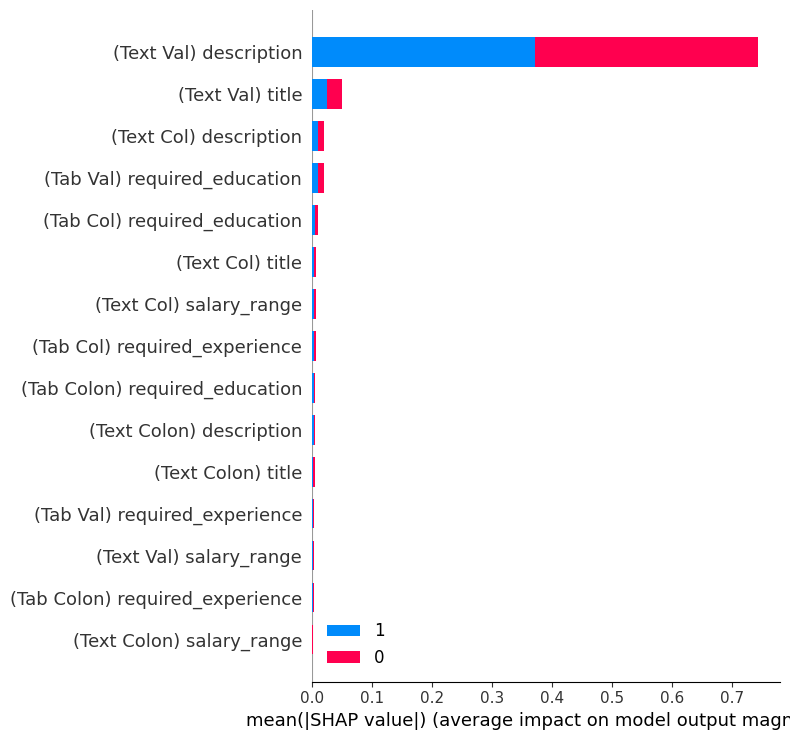

No model type specified for jigsaw. (This is fine during dataset creation)



        #################
        jigsaw
        #################
        


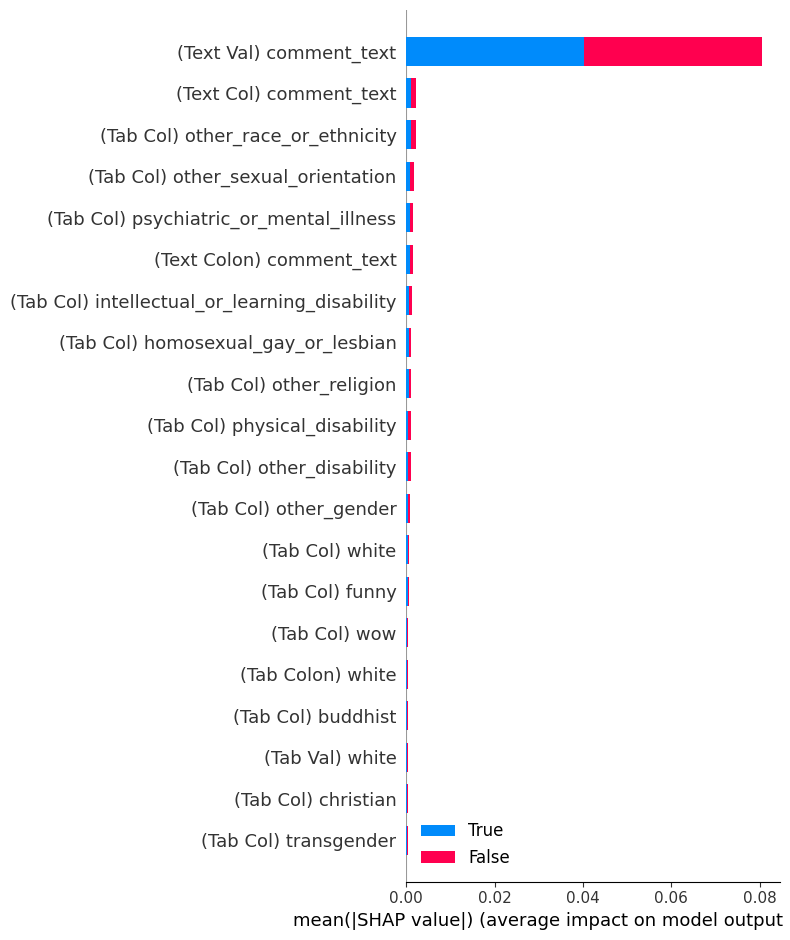

No model type specified for kick. (This is fine during dataset creation)



        #################
        kick
        #################
        


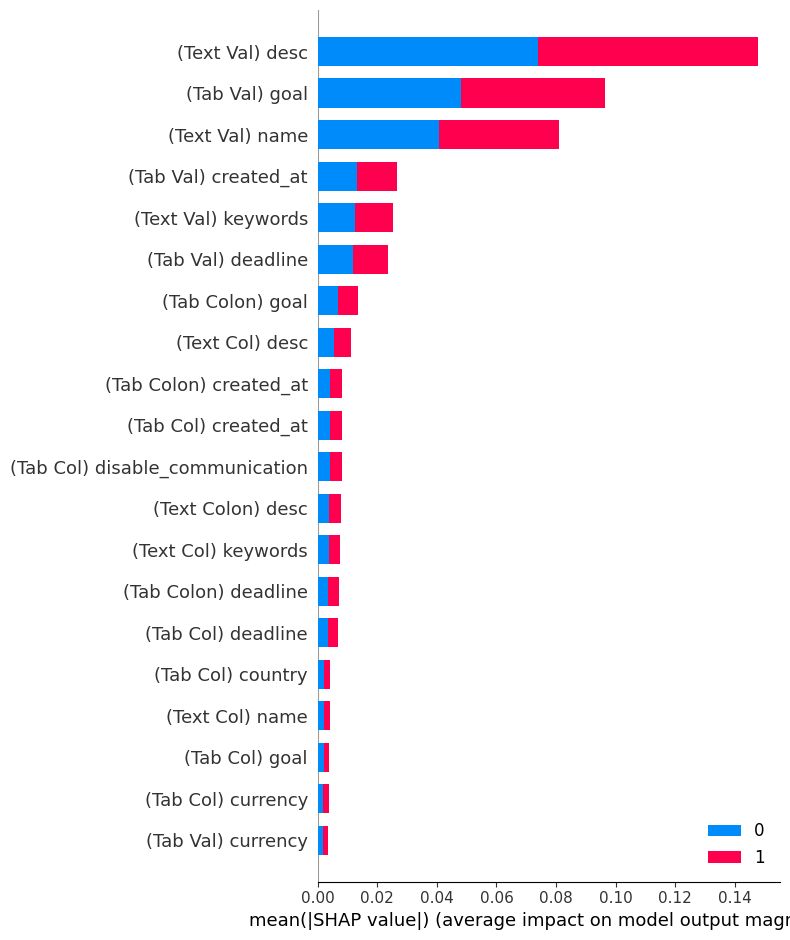

No model type specified for wine. (This is fine during dataset creation)



        #################
        wine
        #################
        


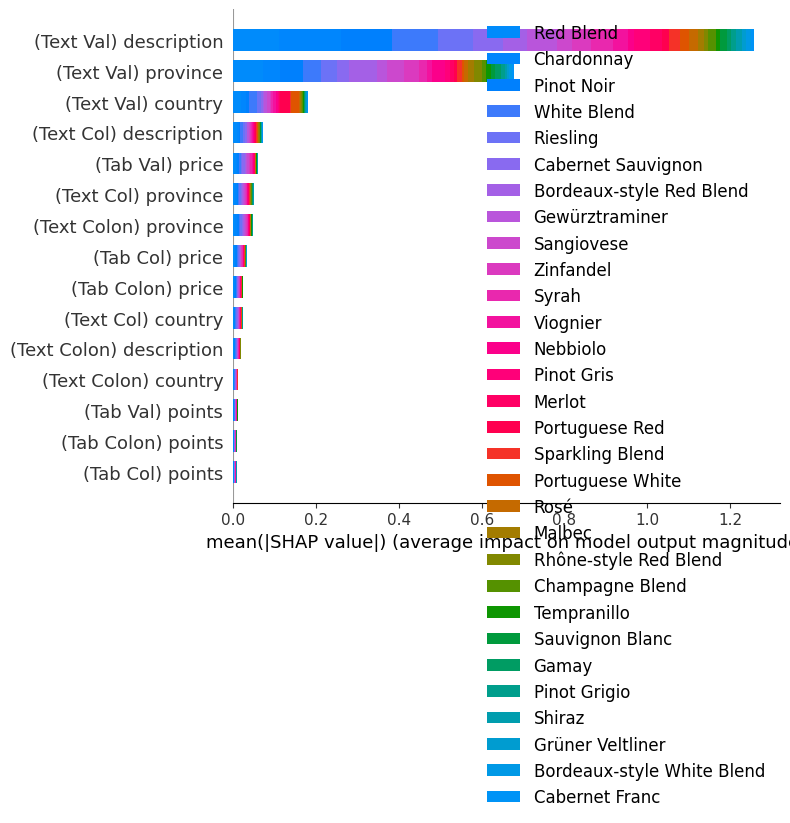

No model type specified for imdb_genre. (This is fine during dataset creation)



        #################
        imdb_genre
        #################
        


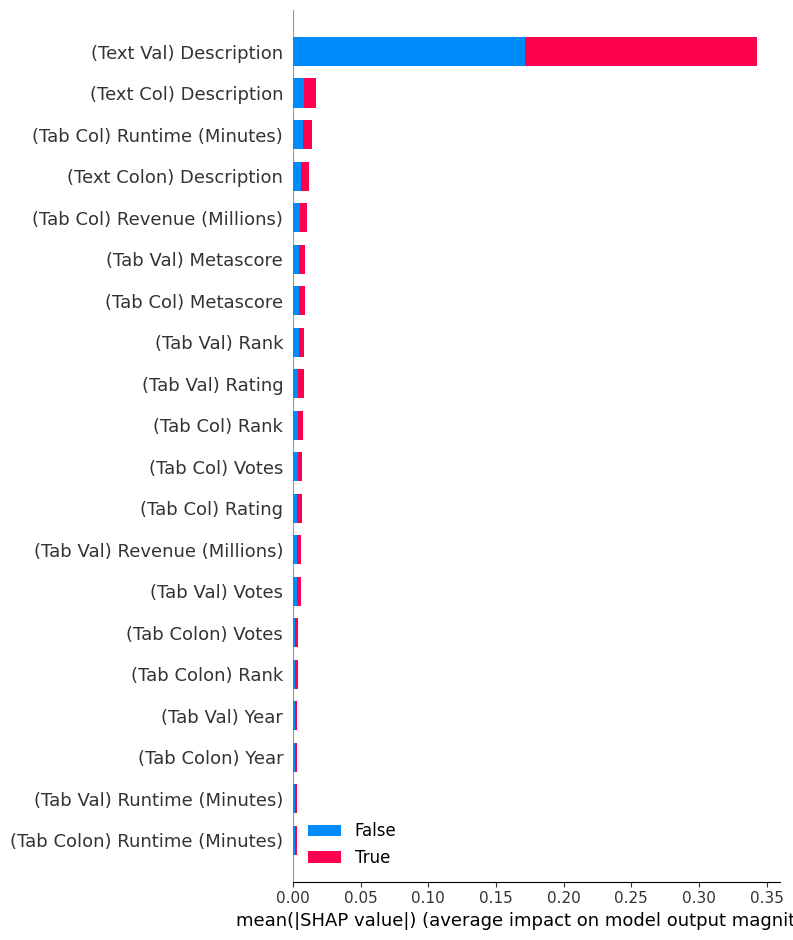

No model type specified for prod_sent. (This is fine during dataset creation)



        #################
        prod_sent
        #################
        


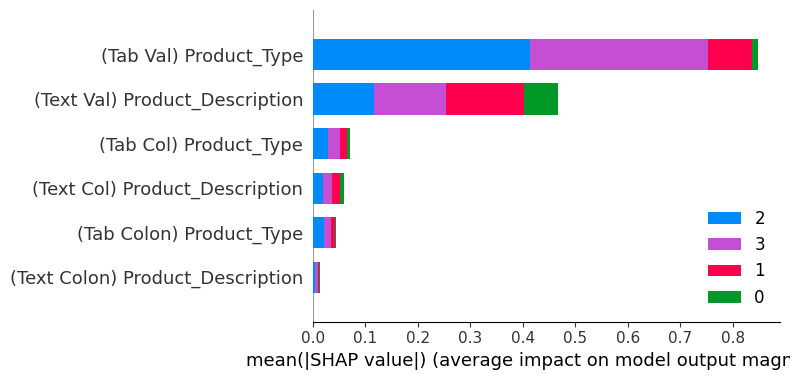

In [28]:
tab_scale_factor = 1

for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    )
    colon_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    )
    fts_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"
    )

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
    shap.summary_plot(
        list(
            np.concatenate(
                [
                    val_only,
                    grouped_col_name_shap_vals,
                    grouped_colon_shap_vals,
                ],
                axis=2,
            )
        ),
        features=[f"(Tab Val) {col}" for col in di.tab_cols]
        + [f"(Text Val) {col}" for col in di.text_cols]
        + [f"(Tab Col) {col}" for col in di.tab_cols]
        + [f"(Text Col) {col}" for col in di.text_cols]
        + [f"(Tab Colon) {col}" for col in di.tab_cols]
        + [f"(Text Colon) {col}" for col in di.text_cols],
        class_names=di.label_names,
    )

## Column names and colons together

No model type specified for fake. (This is fine during dataset creation)



        #################
        fake
        #################
        


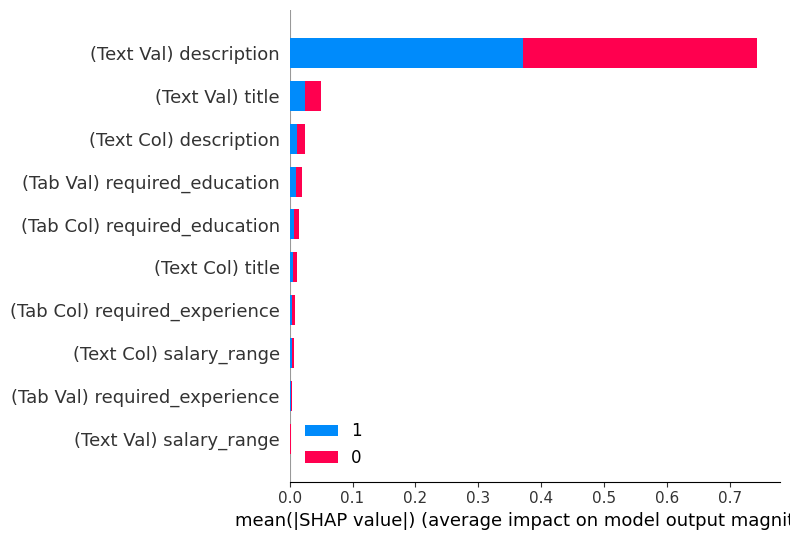

No model type specified for jigsaw. (This is fine during dataset creation)



        #################
        jigsaw
        #################
        


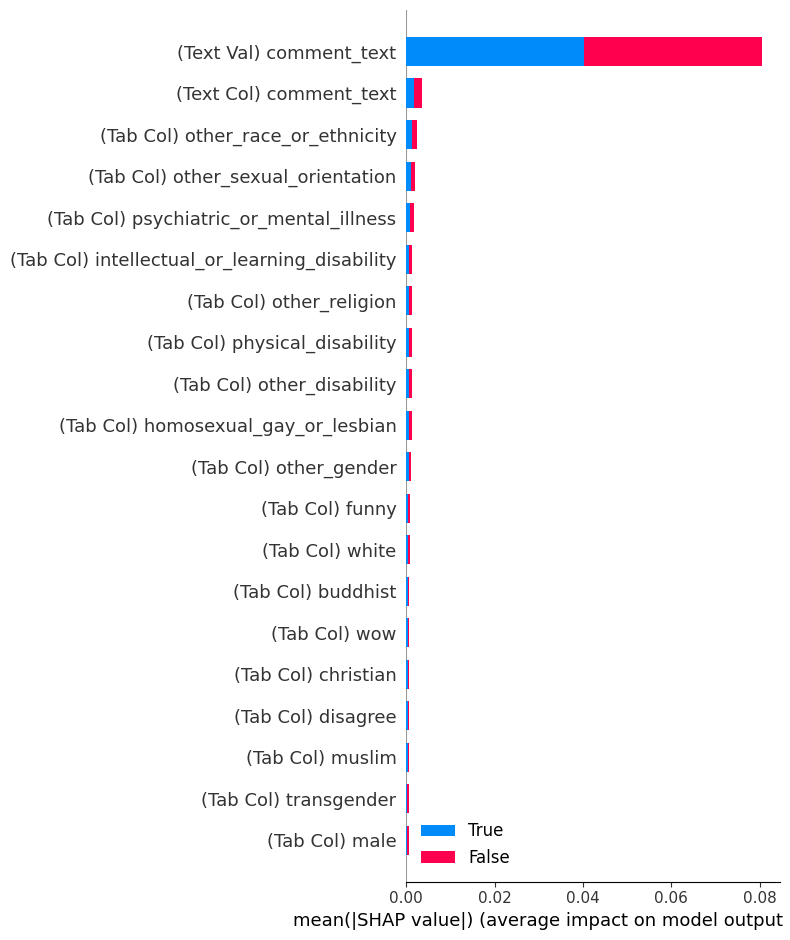

No model type specified for kick. (This is fine during dataset creation)



        #################
        kick
        #################
        


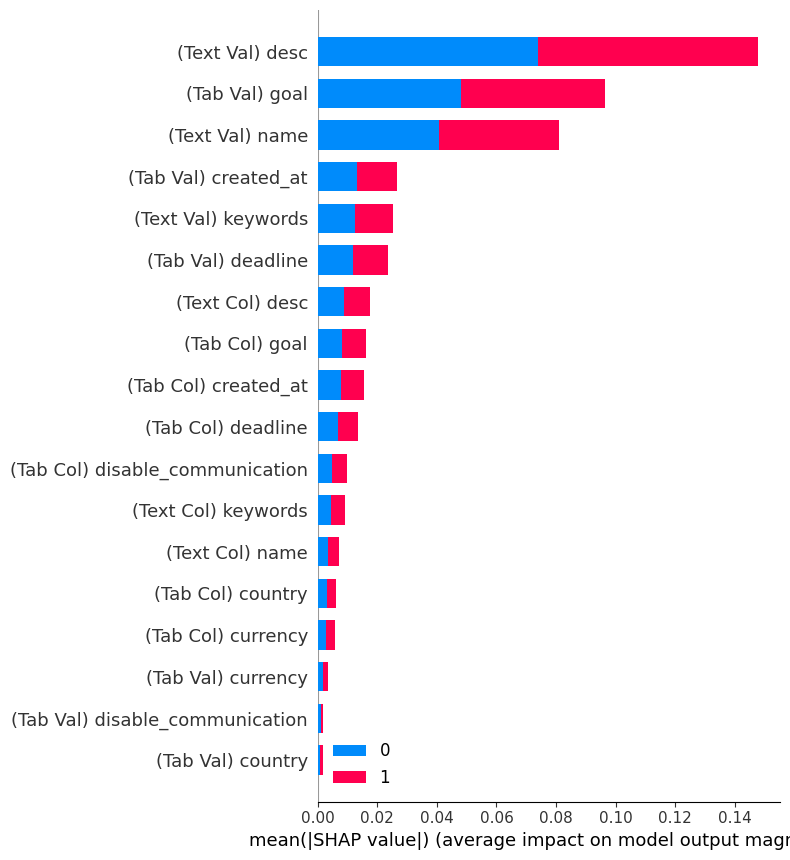

No model type specified for wine. (This is fine during dataset creation)



        #################
        wine
        #################
        


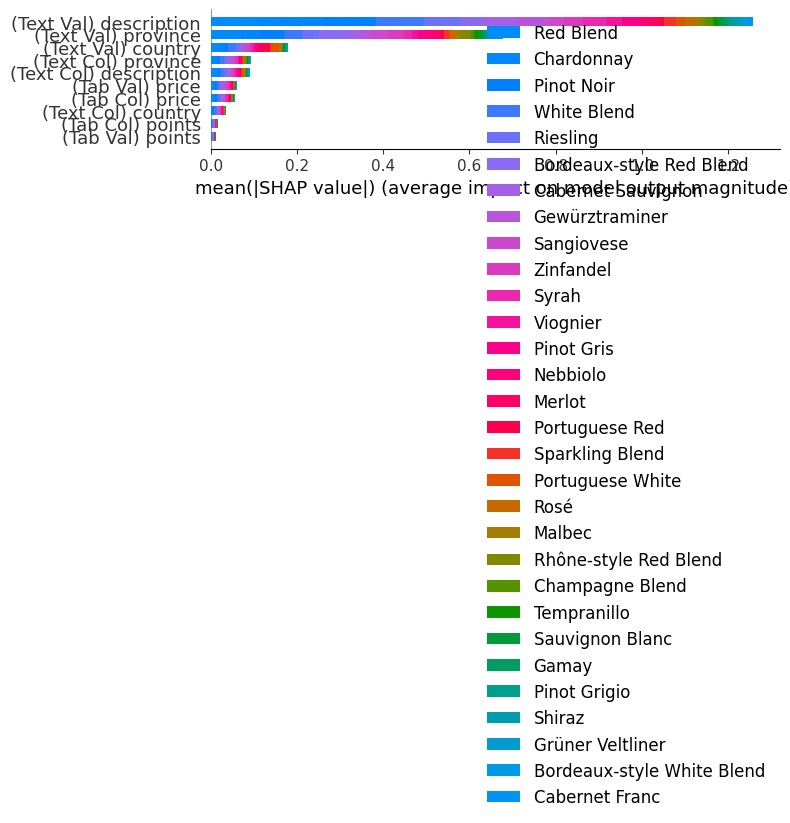

No model type specified for imdb_genre. (This is fine during dataset creation)



        #################
        imdb_genre
        #################
        


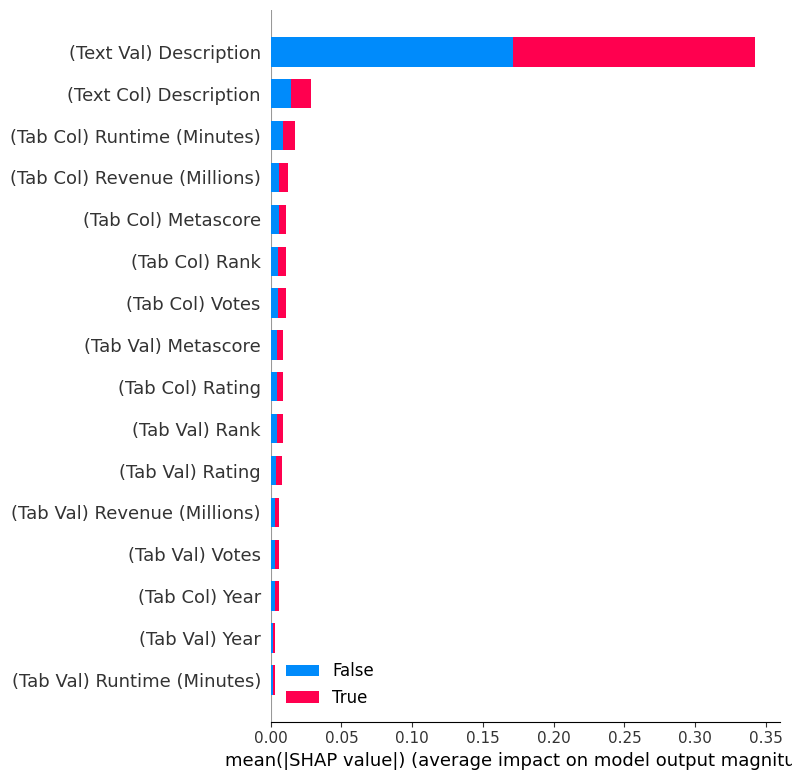

No model type specified for prod_sent. (This is fine during dataset creation)



        #################
        prod_sent
        #################
        


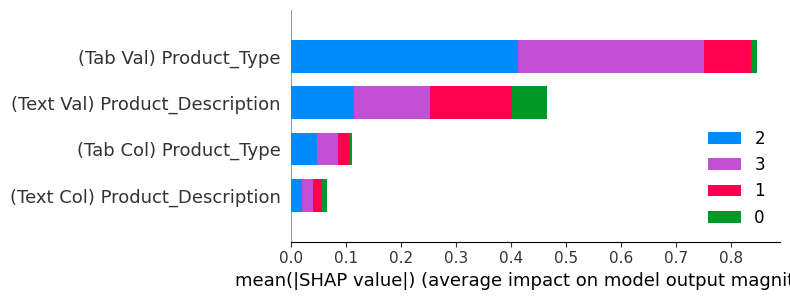

In [30]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    )
    colon_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    )
    fts_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"
    )

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    shap.summary_plot(
        list(
            np.concatenate(
                [
                    val_only,
                    col_plus_colon,
                ],
                axis=2,
            )
        ),
        features=[f"(Tab Val) {col}" for col in di.tab_cols]
        + [f"(Text Val) {col}" for col in di.text_cols]
        + [f"(Tab Col) {col}" for col in di.tab_cols]
        + [f"(Text Col) {col}" for col in di.text_cols],
        class_names=di.label_names,
    )

## Column name and colon values as a proportion of value

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### Values

In [100]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    )
    colon_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    )
    fts_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"
    )

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    # - np.abs(grouped_colon_shap_vals)
    val_only = grouped_shap_vals - col_plus_colon

    # By class
    for class_i, val_class in enumerate(val_only):
        print(f"Class {class_i}")
        ft_avgs = []
        for ft in range(val_only.shape[2]):
            val_ft = val_class[:, ft]
            col_plus_colon_ft = col_plus_colon[class_i, :, ft]
            ft_avgs.append(
                (
                    np.abs(col_plus_colon_ft[val_ft != 0]
                           ) / np.abs(val_ft[val_ft != 0])
                ).mean()
            )
        print(f"Mean(|Col name|/|Col Value|): {ft_avgs}")
        if val_only.shape[0] == 2:
            break
    print(
        f"Mean(|Col name|/|Col Value|): {(np.abs(col_plus_colon[val_only != 0])/np.abs(val_only[val_only != 0])).mean()}"
    )


        #################
        fake
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [3.328064395269516, 2.5147495931210333, 0.9271648594992999, 0.361539304273396, 9.23333347928027]
Mean(|Col name|/|Col Value|): 3.212780591677208

        #################
        jigsaw
        #################
        
Class 0
Mean(|Col name|/|Col Value|): [1.7866666666666668, 2.6734917027268703, 2.67964263971521, 2.683442661729511, 2.697148622903934, 2.6774511916987653, 2.679819578107979, 2.679893138637041, 2.665037364637578, 8.093547351174932, 10.118448961253836, 2.6690548625345105, 4.811505597045974, 2.722278508510964, 2.087041397546635, 5.570668783591518, 4.486586065935106, 7.754854533232188, 4.726181060870016, 8.35178284026679, 5.087427860292803, 21.22658564204068, 2.590917531524519, 3.8550825414328385, 4.86333307193797, 3.279651158564223, 3.1296191980304586, 2.9637296734598313, 2.7208363775981854, 0.14982087652219309]
Mean(|Col name|/|Col Value|): 4.4826391831968575

### Charts


        #################
        fake
        #################
        


The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.


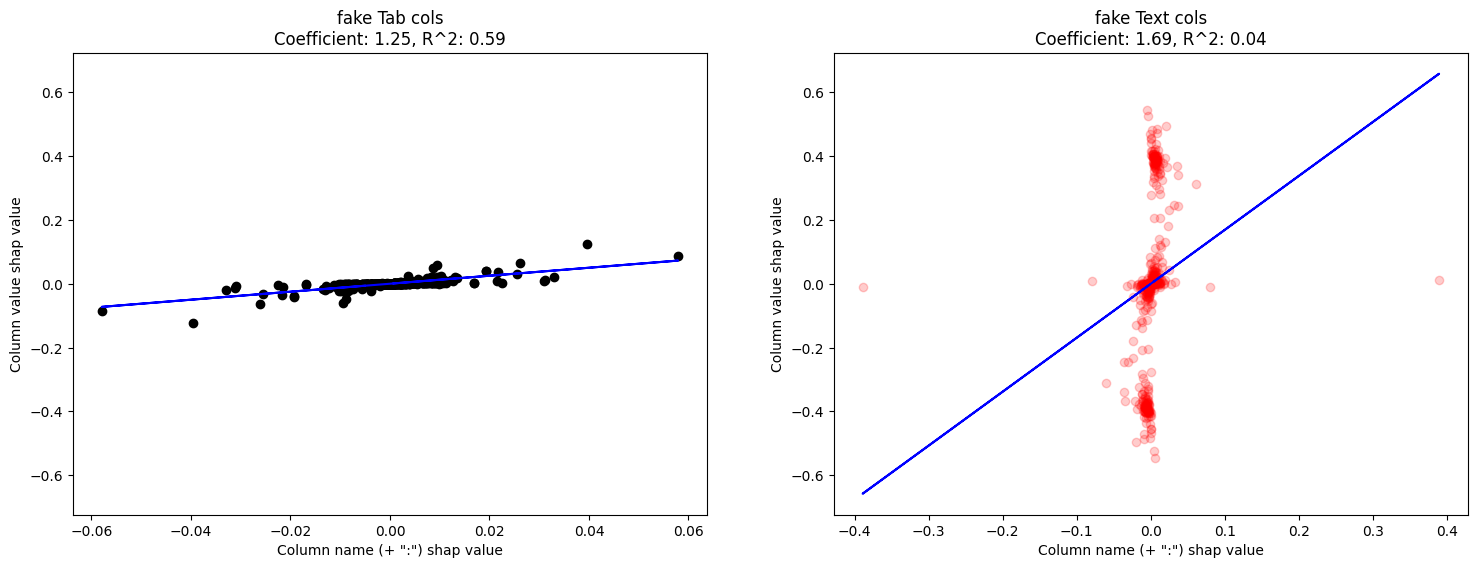


        #################
        jigsaw
        #################
        


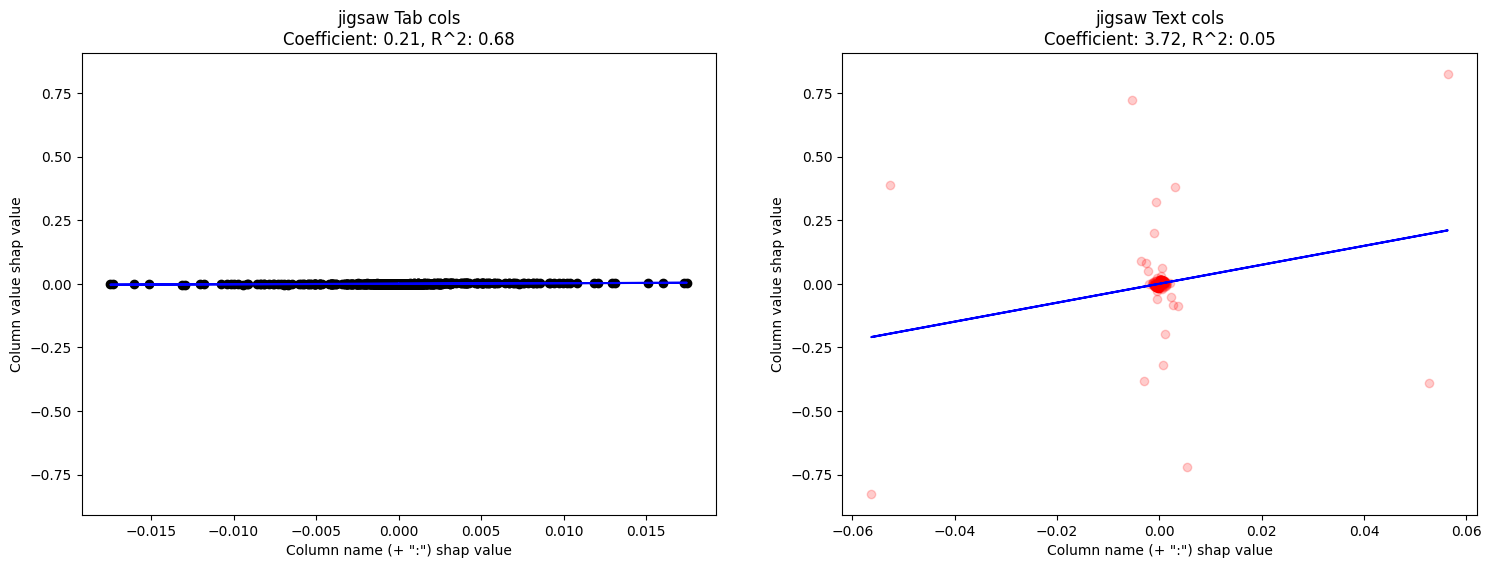


        #################
        kick
        #################
        


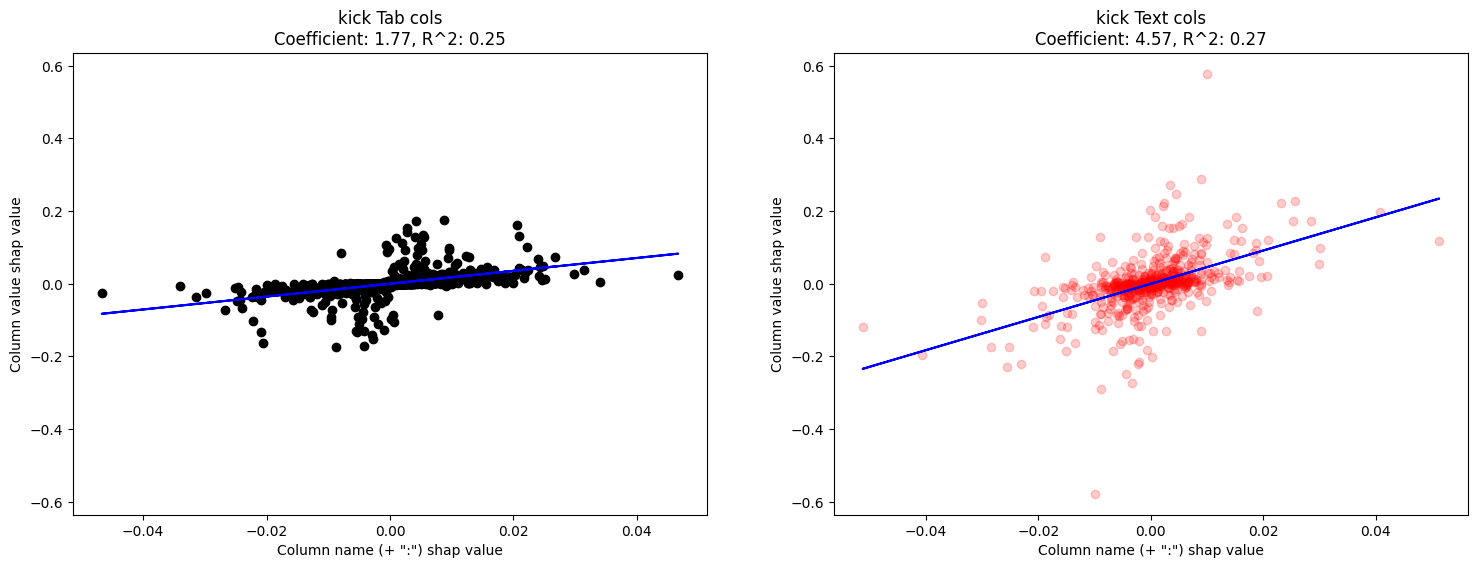


        #################
        wine
        #################
        


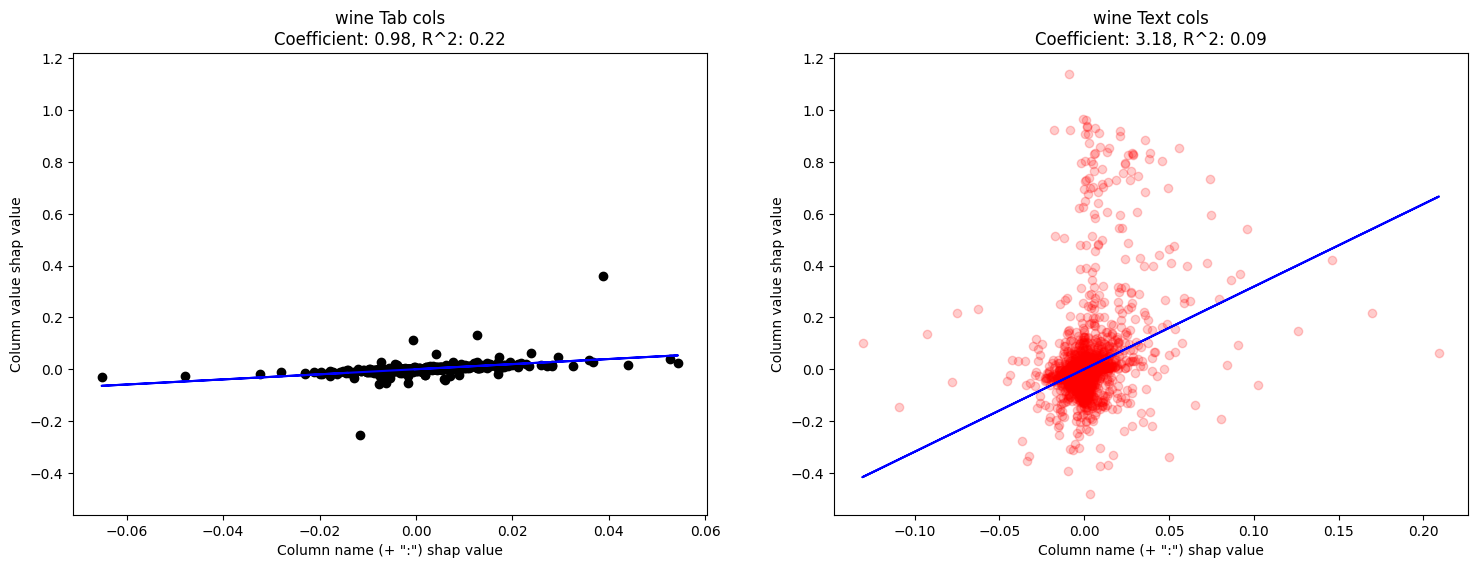


        #################
        imdb_genre
        #################
        


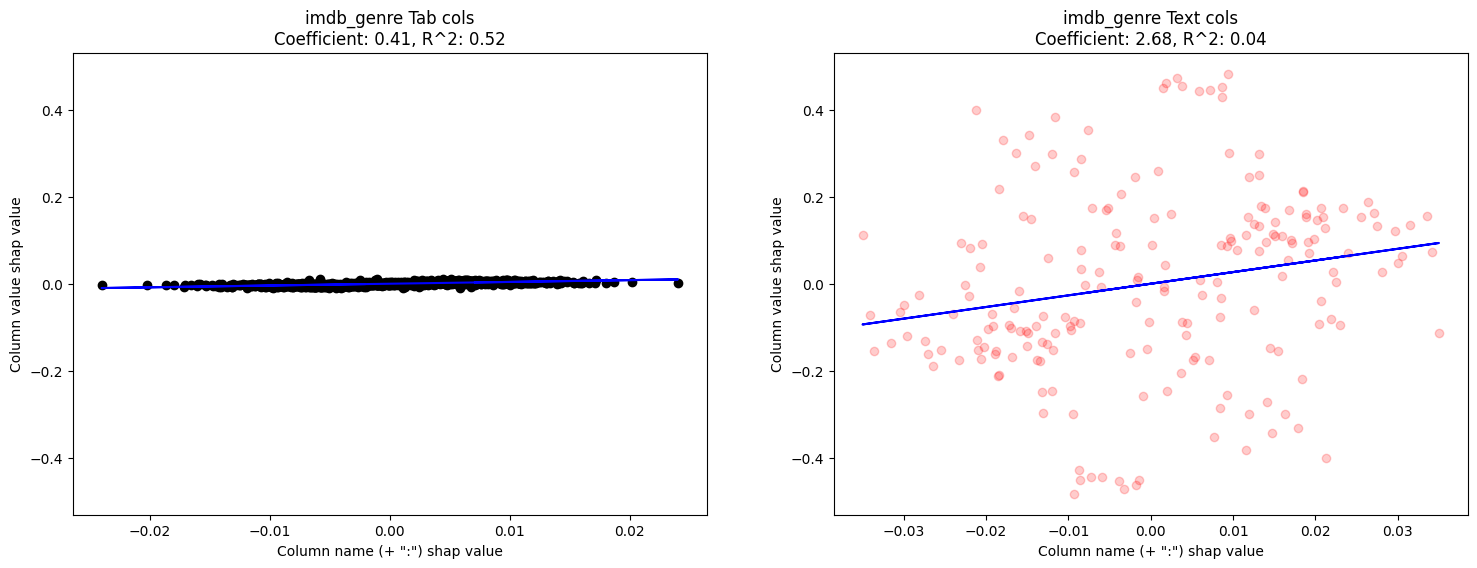


        #################
        prod_sent
        #################
        


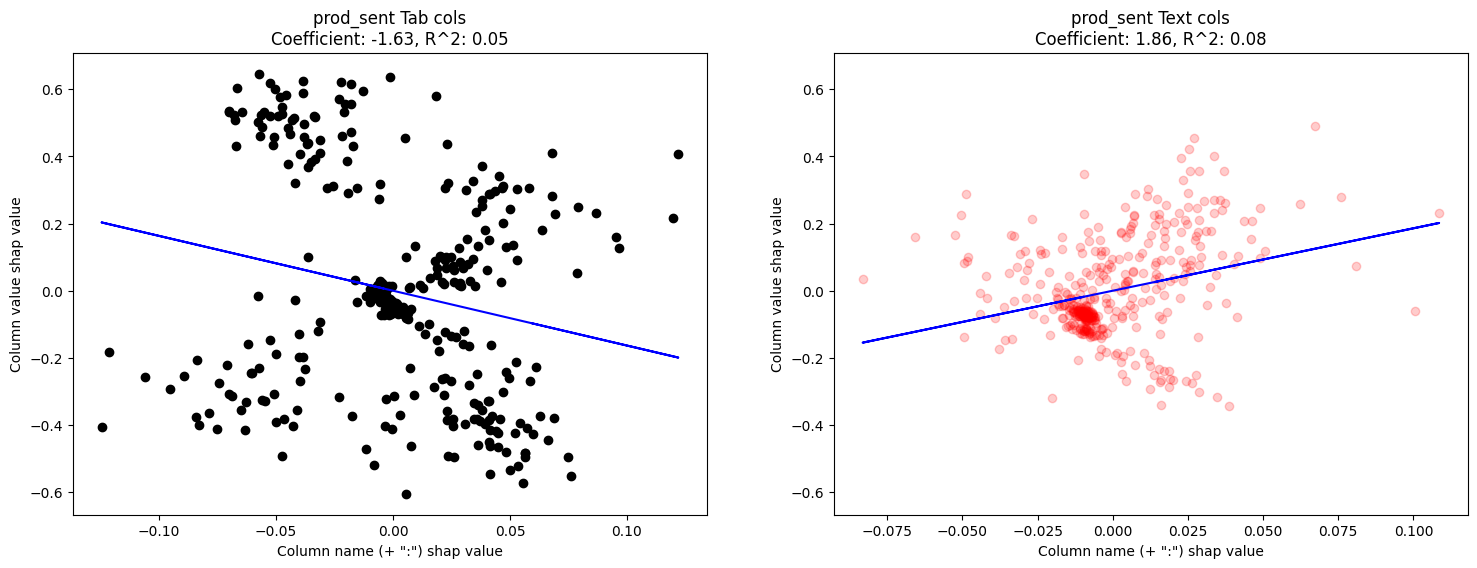

In [101]:
for ds_name in ["fake", "jigsaw", "kick", "wine", "imdb_genre", "prod_sent"]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    )
    colon_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    )
    fts_filepath = (
        f"../models/shap_vals{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"
    )

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    col_plus_colon = grouped_col_name_shap_vals + grouped_colon_shap_vals
    # - np.abs(grouped_colon_shap_vals)
    val_only = grouped_shap_vals - col_plus_colon

    # Create a figure and axes
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(18, 6)
    )  # Set figsize to (12, 6) for twice the width

    # Plot the tab columns
    x1 = col_plus_colon[:, :, : len(di.tab_cols)].flatten()
    y1 = val_only[:, :, : len(di.tab_cols)].flatten()
    ax1.plot(x1, y1, "o", color="black")

    # Add the best-fit line
    # Fit a first-degree (linear) polynomial
    coefficients1 = np.polyfit(x1, y1, 1)
    best_fit1 = np.polyval(coefficients1, x1)
    ax1.plot(x1, best_fit1, color="blue")

    # Calculate r^2 value
    correlation_matrix1 = np.corrcoef(x1, y1)
    correlation_coefficient1 = correlation_matrix1[0, 1]
    r_squared1 = correlation_coefficient1**2

    # Set the labels
    ax1.set_title(
        ds_name
        + " Tab cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
            coefficients1[0], r_squared1
        )
    )
    ax1.set_xlabel('Column name (+ ":") shap value')
    ax1.set_ylabel("Column value shap value")

    # Plot the text columns
    x2 = col_plus_colon[:, :, len(di.tab_cols):].flatten()
    y2 = val_only[:, :, len(di.tab_cols):].flatten()
    ax2.plot(x2, y2, "o", color="red", alpha=0.2)

    # Add the best-fit line
    # Fit a first-degree (linear) polynomial
    coefficients2 = np.polyfit(x2, y2, 1)
    best_fit2 = np.polyval(coefficients2, x2)
    ax2.plot(x2, best_fit2, color="blue")

    # Calculate r^2 value
    correlation_matrix2 = np.corrcoef(x2, y2)
    correlation_coefficient2 = correlation_matrix2[0, 1]
    r_squared2 = correlation_coefficient2**2

    # Set the labels
    ax2.set_title(
        ds_name
        + " Text cols\nCoefficient: {:.2f}, R^2: {:.2f}".format(
            coefficients2[0], r_squared2
        )
    )
    ax2.set_xlabel('Column name (+ ":") shap value')
    ax2.set_ylabel("Column value shap value")

    # Share the y-axis
    ax1.get_shared_y_axes().join(ax1, ax2)

    # Show the plot
    plt.show()

In [77]:
val_only.shape

(4, 100, 2)

In [57]:
val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals

In [46]:
(val_only / grouped_shap_vals).mean(axis=2).mean(axis=1)


array([0.6367625 , 0.85190613, 1.60049902, 1.13049709])

In [25]:
np.concatenate(
    [grouped_shap_vals, grouped_col_name_shap_vals, grouped_colon_shap_vals], axis=2
).shape


(2, 100, 15)